# M1 Mini-Assignment 1
https://app.slack.com/client/TM1M8EXC4/CM49Y2M4N

https://colab.research.google.com/drive/1q2v-bwfdq5zknJfYHijN1M54PUAUStJH

## 1. Preprocessing

In [0]:
import pandas as pd

In [0]:
trips = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/trips.csv', parse_dates=True)

### Timestamps

In [0]:
#trips['date_start'] = pd.to_datetime(trips['date_start'], format = '%Y-%m-%d')
#trips['date_end'] = pd.to_datetime(trips['date_end'], format = '%Y-%m-%d')

#This results in an error.

In [0]:
trips['date_start'] = pd.to_datetime(trips['date_start'], errors='coerce')
trips['date_end'] = pd.to_datetime(trips['date_end'], errors='coerce')  
#I convert date_start and date_end to timestamps.

In [86]:
trips.sort_values(by=['date_start']).head(10)
#Looks good.

,Unnamed: 0,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug
6669,6669,@diniska,Russia,RU,russia,2015-11-01,1970-01-01,55,37,Moscow,moscow-russia
45580,45580,@fubchris,Canada,CA,canada,1981-02-01,1975-01-03,45,-75,Ottawa,ottawa-canada
45581,45581,@fubchris,Netherlands,NL,netherlands,1975-01-03,1975-01-03,52,4,Amsterdam,amsterdam-netherlands
31726,31726,@benjturner,United States,US,united-states,1993-07-03,1977-03-14,32,-95,Tyler,united-states
40968,40968,@allan,Canada,CA,canada,1979-07-02,1978-06-02,51,-85,Ontario,canada
40967,40967,@allan,United States,US,united-states,1979-07-05,1979-07-02,42,-78,Buffalo,buffalo-ny-united-states
40966,40966,@allan,Canada,CA,canada,1981-07-12,1979-07-05,51,-85,Ontario,canada
45538,45538,@thomasghenry,United States,US,united-states,1984-01-01,1981-07-08,40,-73,Queens,united-states
40965,40965,@allan,United States,US,united-states,1981-07-26,1981-07-12,25,-80,Miami,miami-fl-united-states
40964,40964,@allan,Canada,CA,canada,1981-12-12,1981-07-26,51,-85,Ontario,canada


In [87]:
trips.sort_values(by=['date_start']).tail(20)
#Here some dates are way out in the future, this does not seem rigth. I will come back to this.
#Also we have a lot of NaT's.

,Unnamed: 0,username,country,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug
27402,27402,@levelsio,United States,US,united-states,2034-06-01,2034-06-01,28,-80,Cape Canaveral,united-states
21136,21136,@meedamian,Mars,MARS,mars,2035-12-09,2034-12-09,28,-80,Mars City,mars-city-mars
27401,27401,@levelsio,Mars,MARS,mars,2036-01-01,2035-01-01,28,-80,Mars City,mars-city-mars
27400,27400,@levelsio,United States,US,united-states,2036-01-02,2036-01-02,28,-80,Cape Canaveral,united-states
21135,21135,@meedamian,United States,US,united-states,2037-06-09,2036-06-09,28,-80,Cape Canaveral,united-states
16193,16193,@jonnylroberts,Indonesia,ID,indonesia,2104-04-16,2104-04-01,-8,115,Sanur,indonesia
16192,16192,@jonnylroberts,Australia,AU,australia,2106-03-21,2106-03-18,-33,151,Sydney,sydney-australia
16191,16191,@jonnylroberts,Indonesia,ID,indonesia,2106-06-03,2106-05-25,-8,115,Ubud,ubud-bali-indonesia
16190,16190,@jonnylroberts,Indonesia,ID,indonesia,2106-06-30,2106-06-19,-8,116,Lombok,indonesia
4366,4366,@hjbarraza,Belgium,BE,belgium,2012-11-08,NaT,50,3,Kortrijk,belgium


In [0]:
trips=trips.dropna()
#We drop NaT's.

### Duration

In [0]:
import datetime

In [0]:
trips['duration'] = trips['date_end']-trips['date_start']
trips['duration'] = trips.apply(lambda x: x['duration'].days, axis=1) #Makes duration an int.

### Filter dates and durations

In [0]:
#Here I want to remove trips that has a start date in 2020 or further out in the future, which I commented on earlier.
not_future = trips['date_start'].dt.year<2020
trips = trips[not_future]
#I thought about dropping rows with dates_end in the future, but I don't know if the dataset includes trips booked in the near future or ongoing trips, so I keept thoose.

In [92]:
trips.sort_values(by=['duration']).head(10) #.tail(10)
#In the head there is a trip with negative duration as well as trips with a duration of 0 days, so I delete them. 
#The tail showed LOOONG trips, so I drop trips longer than 10 years.
more_than_0_days = trips['duration']>0
less_than_10_years = trips['duration']<3650
trips = trips[more_than_0_days]
trips = trips[less_than_10_years]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


### Countrylist

In [0]:
countrylist = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/countrylist.csv', parse_dates=True)
trips=pd.merge(trips, countrylist, left_on='country_code', right_on='alpha_2', how='inner')

### DateTime index

In [0]:
trips_with_index=trips.set_index('date_start') 
# I liked it better with date_start as a seperate collum, so I did not use this dataframe in the rest of the assignment.

## 2. People

### High School diploma

In [95]:
people = pd.read_csv('https://github.com/SDS-AAU/M1-2019/raw/master/data/people.csv', parse_dates=True)
people.head()

,Unnamed: 0,username,followers,following,work_raw,education_raw
0,0,@lewellenmichael,1,2,"Software Dev, Startup Founder, Finance, Crypto...","High School, Bachelor's Degree"
1,1,@waylandchin,0,2,NaN,NaN
2,2,@karan,2,1,NaN,NaN
3,3,@skaboss217,0,1,NaN,NaN
4,4,@apwn,17,426,Web Dev,NaN


In [0]:
people=people.dropna(subset=['education_raw'])
#Drops rows with NAN's i education_raw.

In [97]:
people['education_raw'].str.contains('High School').sum()
#There are 130 people who listed they have a High School diploma.

130

In [98]:
people['education_raw'].unique()
high_school = people['education_raw'].str.contains("High School")
bachelor = people['education_raw'].str.contains("Bachelor's Degree")
master = people['education_raw'].str.contains("Master's Degree")
people[high_school | bachelor | master].shape[0]
#If we assume everyone one with a bachelor's or master's degree also have a High School diploma, then the number is 451.

451

### Software Dev with a Master's Degree

In [99]:
software_dev=people['work_raw'].str.contains('Software Dev')
people[software_dev & master].shape[0]
#57 people working with Software Dev have a Master's Degree.

57

### Master's Degree that has the highest number of followers

In [100]:
people[master].sort_values(by='followers',ascending=False).head(1)
#The person with the highest number of followers has 2182 followers.
#The person is a Software Dev, Startup Founder and Creative.

,Unnamed: 0,username,followers,following,work_raw,education_raw
2043,2043,@levelsio,2182,353,"Software Dev, Startup Founder, Creative","High School, Bachelor's Degree, Master's Degree"


## Trips

### Country with the highest number of trips

In [101]:
trips.groupby('country').count().sort_values('username', ascending=False).head(1)
#United States with 7305 trips

,Unnamed: 0,username,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,duration,alpha_2,region,sub_region
country,,,,,,,,,,,,,,
United States,7305,7305,7305,7305,7305,7305,7305,7305,7305,7305,7305,7305,7305,7305


### Country with the highest number of trips in 2017 (start)

In [102]:
trips_2017 = trips['date_start'].dt.year==2017
trips[trips_2017].groupby('country').count().sort_values('username', ascending=False).head(1)
#Also United States with 1857 trips

,Unnamed: 0,username,country_code,country_slug,date_end,date_start,latitude,longitude,place,place_slug,duration,alpha_2,region,sub_region
country,,,,,,,,,,,,,,
United States,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


### Country in 'Eastern Asia' where travellers spent on average least time when going there? 
Provide a visualization.

In [103]:
trips_EA = trips['sub_region']=='Eastern Asia'
trips[trips_EA].groupby('country').mean().sort_values('duration', ascending=False).tail(1)
#North Korea with 4 days.

,Unnamed: 0,latitude,longitude,duration
country,,,,
North Korea,32304.888889,39.111111,124.888889,4.0


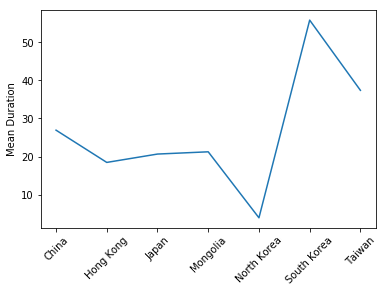

In [104]:
#Visualization
import matplotlib.pyplot as plt
data_for_plot=trips[trips_EA].groupby('country').mean()['duration']
plt.plot(data_for_plot)
plt.xticks(rotation=45)
plt.ylabel('Mean Duration')
plt.show()

### Do nomads that indicate working in “Software Dev” tend to have shorter or longer trips on average?

In [0]:
data=pd.merge(trips, people, on='username', how='inner')

In [109]:
data_work=data.dropna(subset=['work_raw'])
soft_dev=data_work['work_raw'].str.contains('Software Dev')
print('Mean duration for Software Devs:')
print(data_work[soft_dev].mean()['duration'])
print('---------------------')
print('Mean duration for non Software Devs:')
print(data_work[~soft_dev].mean()['duration'])
#Software Devs spend slightly more time on their trips.

Mean duration for Software Devs:
34.937417072091996
---------------------
Mean duration for non Software Devs:
34.850766255021576


### Visualize over-time median trip duration overall (bonus: and split by world-region).
Hint: Python – resample by week (‘W’) and calculate the size of observations.

In [0]:
data['week'] = data['date_start'].dt.week
#Nice to have week as a seperate collum.

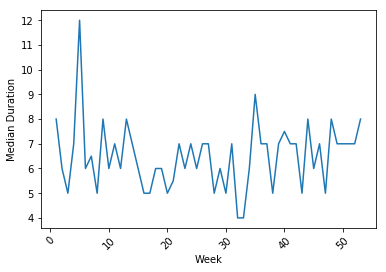

In [107]:
#Plotted to visualize the median duration of trips begun i a given week.
data_for_plot2=data.groupby('week').median()['duration']
plt.plot(data_for_plot2)
plt.xticks(rotation=45)
plt.xlabel('Week')
plt.ylabel('Median Duration')
plt.show()

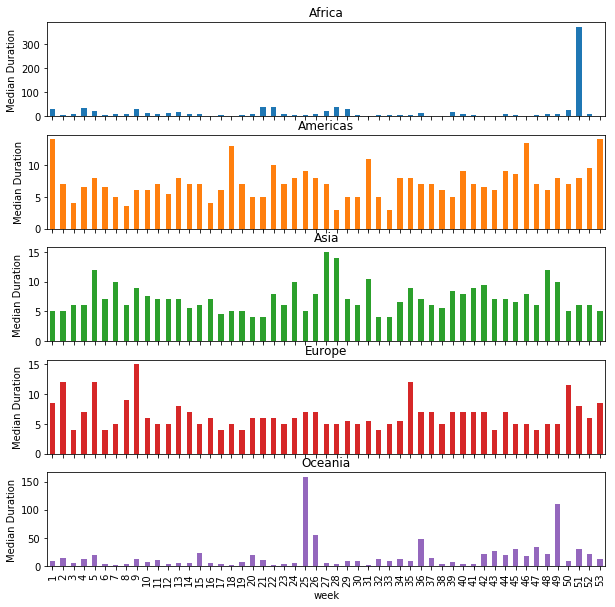

In [137]:
#Plotted to visualize the median duration of trips begun i a given week, per world-region.
data_for_plot3=data.groupby(['week','region']).median()['duration']
ax=data_for_plot3.unstack(1).plot(kind='bar', subplots=True, figsize=(10,10), legend=False)
ax[0].set_ylabel('Median Duration')
ax[1].set_ylabel('Median Duration')
ax[2].set_ylabel('Median Duration')
ax[3].set_ylabel('Median Duration')
ax[4].set_ylabel('Median Duration')
plt.show()